# audio compression in an unsupervised way
#### Author:Aditya Dixit
### Import libraries

In [15]:
%matplotlib inline  
import IPython
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster
from sklearn.decomposition import PCA

###Load the unlabelled dataset

In [16]:
raw_data=pd.read_csv('data.csv')
train_data=raw_data.drop('audio', 1)
size=train_data.shape
print('No of features: '+str(size[1]))
print('No of Data Points: '+str(size[0]))

No of features: 74
No of Data Points: 693


###Visualizing the Data

We will try visualizing the Data using Pair plot.

####Plot for CENS Mean

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


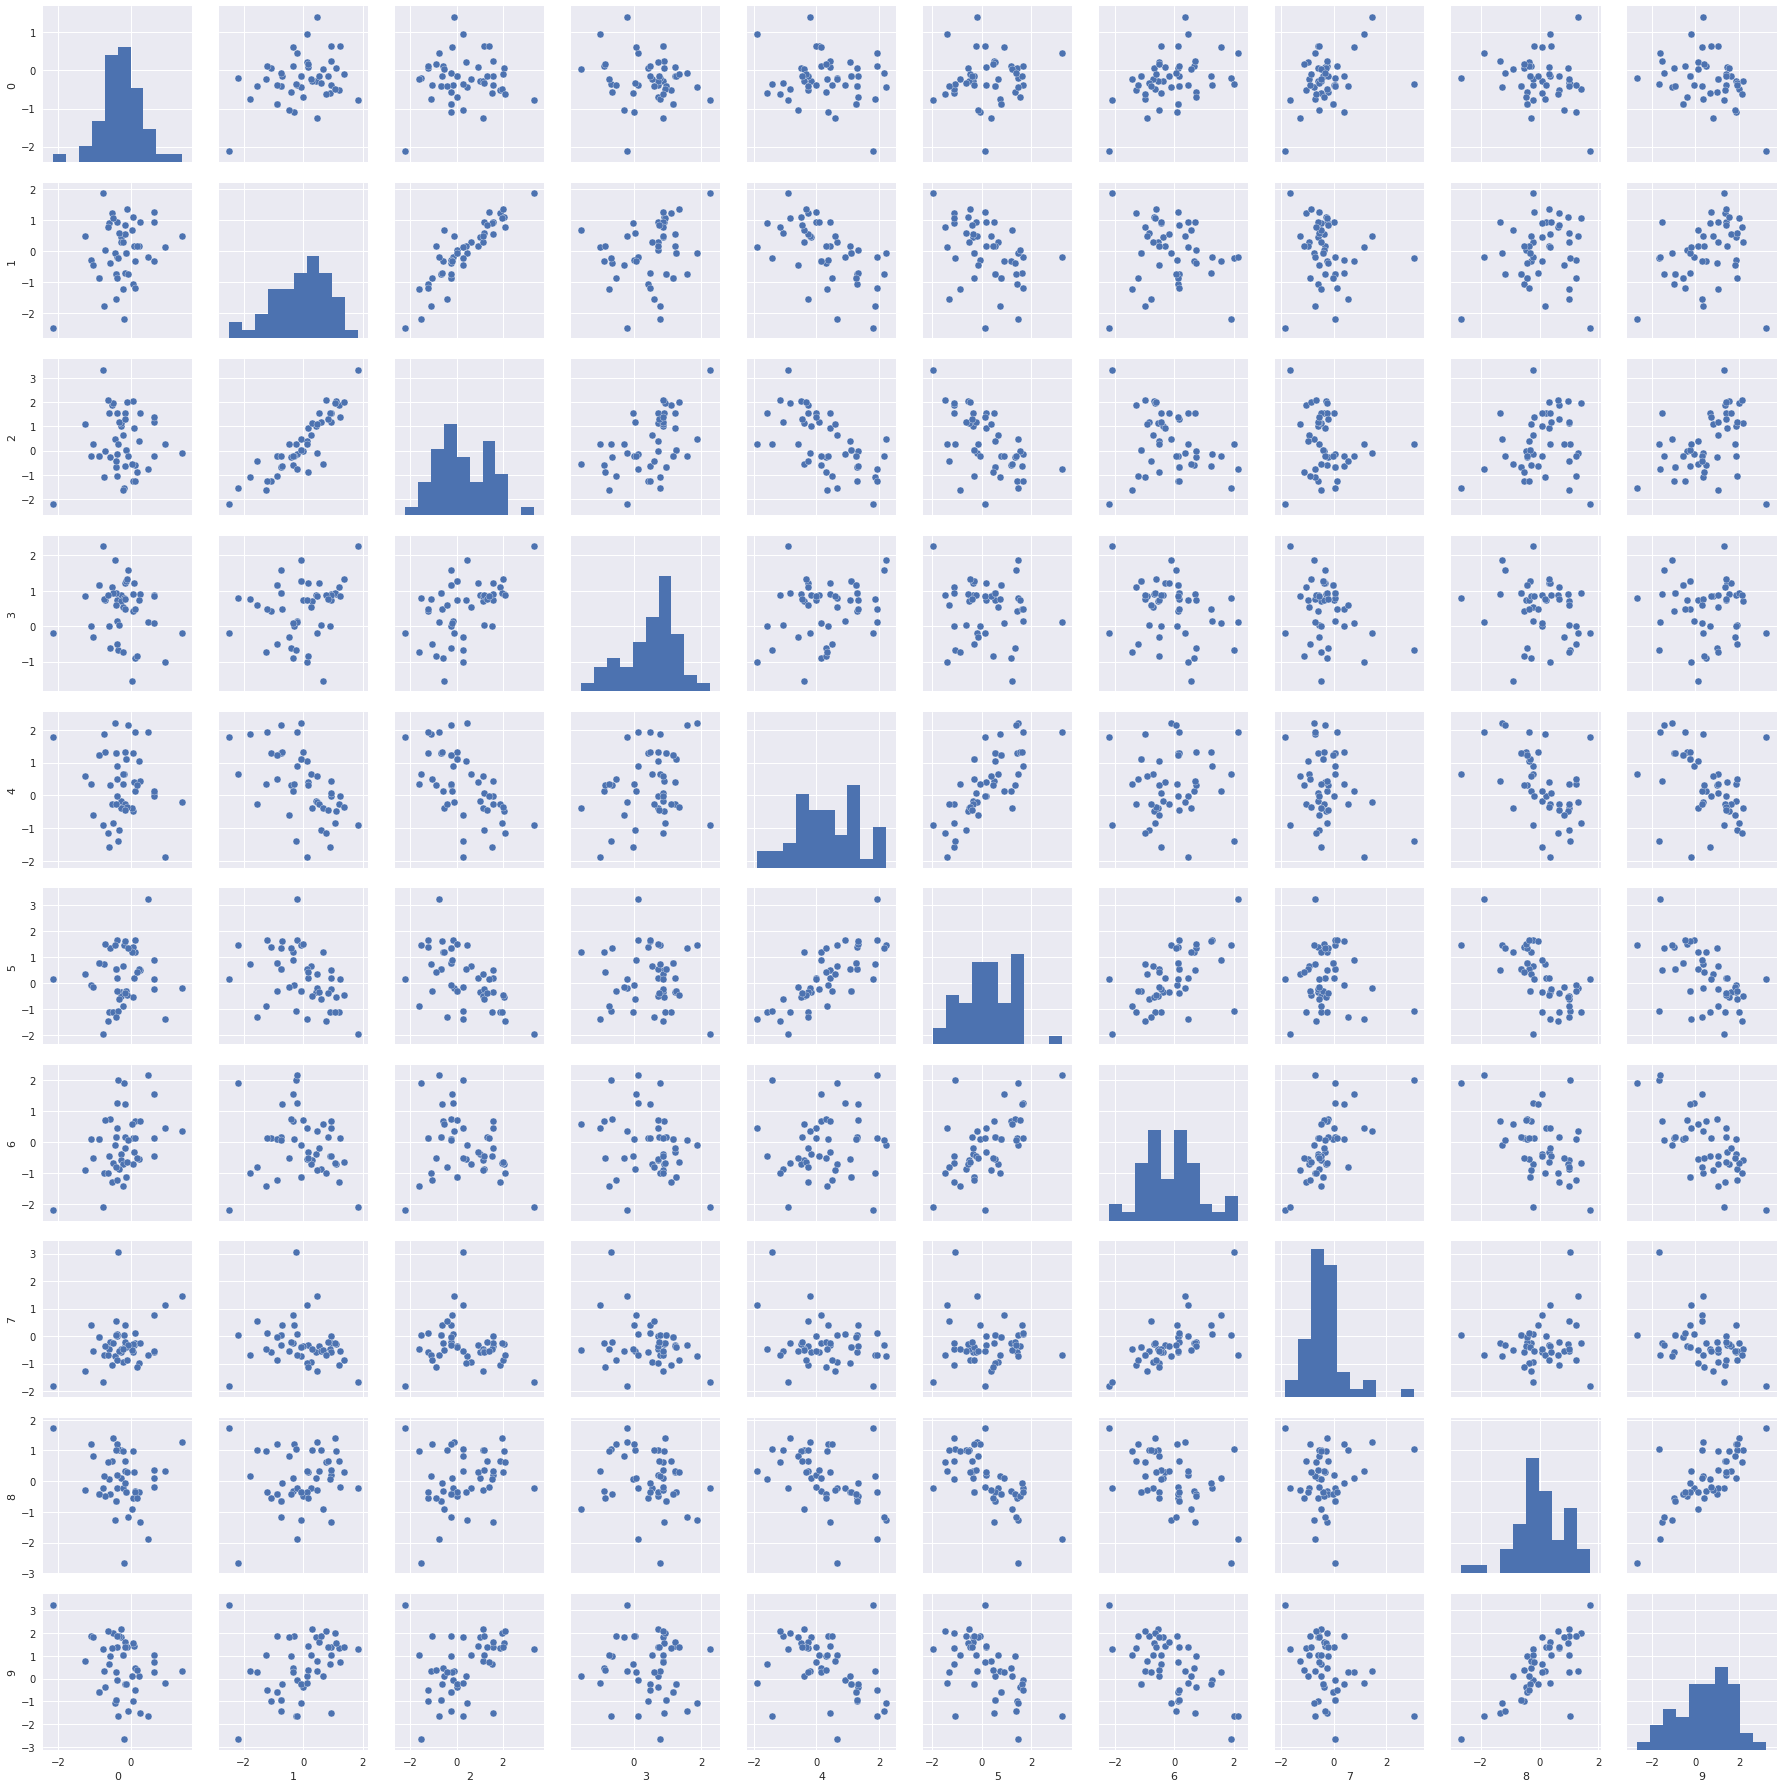

In [131]:
sns.pairplot(train_data.iloc[0:50][train_data.columns[0:10]])

#Preprocessing

In [18]:
train_data=pd.DataFrame(sklearn.preprocessing.scale(train_data))

#Algorithms

- K Means
- Affinity Propagation
- Agglomerative Clustering
- DBSCAN

##K Means Clustering

In [29]:
kmean=sklearn.cluster.KMeans(n_clusters=5,n_jobs=4,max_iter=1000000)
kmean.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000000,
    n_clusters=5, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
def return_file_name(path):
    return os.path.split(path)[1]


clusters_kmean=[]
for i in range(0,kmean.n_clusters):
    new_cluster=raw_data.iloc[np.argwhere(kmean.predict(train_data)==i).T[0]]['audio'].str.strip()
    new_cluster=new_cluster.map(return_file_name)
    clusters_kmeanAgg.append(new_cluster)


In [53]:

for i in range(0,len(clusters_kmean)):
    print('\nCluster'+str(i)+'\n')
    print(clusters_kmean[i].sample(20,replace=True))
    



Cluster0

353                                        One_Thing.mp3
637                               08_Scene Six- Home.mp3
301                                   05 - Let It Be.mp3
356           Origin of Simmetry - 05 - Plug In Baby.mp3
498                             Burning In The Skies.mp3
210             01. Haal E Dil-Www.FullyFreeDown.coM.mp3
265             Copy of Madhubala_-_www.DjPunjab.Com.mp3
92                           Korn_Shoots_And_Ladders.mp3
510                                Anything anything.mp3
410    [Songs.PK] Bhaag Milkha Bhaag - 04 - Maston Ka...
373                                  Pour some sugar.mp3
270    Adele - Skyfall (Radio Rip) (www.SongsLover.pk...
304                              05 - Prem Ki Naiyya.mp3
456    03. Bad (Feat. Vassy) [Radio Edit] (www.SongsL...
551                                  Starting to fly.mp3
531                                          H!Vltg3.mp3
253                     chillarparty01(www.songs.pk).mp3
454    02. Blast Off

##Affinity Propagation

In [32]:
af=sklearn.cluster.AffinityPropagation()
af.fit(train_data)
print('Number of clusters: '+str(len(af.cluster_centers_indices_)))

Number of clusters: 71


Clearly the number of clustes is too high. This is due to the reason that Affinity propagation does not scale well with number of samples

##Agglomerative Clustering

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy.

Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach. This linkage is best suited for Euclidean metrics.

In [50]:
aggl=sklearn.cluster.AgglomerativeClustering(n_clusters=5)
aggl.fit(train_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=5,
            pooling_func=<function mean at 0x7f7ac4264a60>)

In [54]:
clusters_aggl=[]
for i in range(0,5):
    new_cluster=raw_data.iloc[np.argwhere(aggl.fit_predict(train_data)==i).T[0]]['audio'].str.strip()
    new_cluster=new_cluster.map(return_file_name)
    clusters_aggl.append(new_cluster)

for i in range(0,len(clusters)):
    print('\nCluster'+str(i)+'\n')
    print(clusters_aggl[i].sample(10,replace=True))


Cluster0

493                                       Hole.mp3
462             Metallica-Enter Sandman Lyrics.mp3
190              03 - Dil Se Re(MyMp3Song.Com).mp3
480                                       A.06.mp3
481    08 - Fortune Teller (www.SongsLover.pk).mp3
350                           One in a million.mp3
62                                         One.mp3
649                                     Psycho.mp3
21        Creed - Greatest Hits [13] Weathered.mp3
301                             05 - Let It Be.mp3
Name: audio, dtype: object

Cluster1

166    Lamb Of God -Desolation- (Official Video) - Yo...
471            The Final Countdown - Europe (Lyrics).mp3
494                                     Bleed It Out.mp3
343                       Dream_Theater_-_Metropolis.mp3
584                                  With You (Live).mp3
31                              03 - Constant Motion.mp3
163                        Lamb of God - Set to Fail.mp3
160                    (webmusic.in)_Buddh

##DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.

Based on a set of points (let’s think in a bidimensional space as exemplified in the figure), DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

More formally, we define a core sample as being a sample in the dataset such that there exist min_samples other samples within a distance of eps, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least eps in distance from any core sample, is considered an outlier by the algorithm.

###Getting the Euclidean Distance Matrix

In [113]:
from scipy.spatial.distance import squareform, pdist

In [119]:
ecd_mat=pd.DataFrame(squareform(pdist(train_data.ix[:, :])))
ecd_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,683,684,685,686,687,688,689,690,691,692
0,0.000000,5.991557,6.918692,9.970013,13.463622,10.132640,7.637452,9.955278,14.020716,9.138640,...,10.065576,8.372562,7.694627,12.864765,11.895396,11.074408,11.686598,9.390003,8.230463,7.115121
1,5.991557,0.000000,6.743763,9.529905,12.657054,10.075982,7.872598,9.573701,12.330393,9.773800,...,12.253336,7.688454,9.994450,15.358580,11.073402,12.816498,13.903858,10.068851,8.604031,8.181250
2,6.918692,6.743763,0.000000,8.750996,11.872873,9.520853,9.115443,9.376472,11.415724,9.148239,...,13.912785,8.465759,11.023105,14.102313,10.039078,15.179043,15.454171,9.512965,7.705542,9.156108
3,9.970013,9.529905,8.750996,0.000000,9.193289,8.175927,11.347816,6.793463,9.667800,11.311037,...,15.830816,6.984357,12.039162,14.171156,7.728437,16.008698,17.014714,8.871211,6.447493,10.614808
4,13.463622,12.657054,11.872873,9.193289,0.000000,6.905501,14.615560,10.047829,4.947385,15.428524,...,18.524811,9.159754,14.725651,16.485280,6.314194,18.880904,19.962833,13.228515,8.841564,13.582570


Find the average Euclidean Distance between points in the given domain.

In [123]:
mean_ecd=np.mean(ecd_mat.mean())
print('Mean Euclidean Distance: '+str(mean_ecd))

Mean Euclidean Distance: 11.7147206161


We will set eps value using this Euclidean Distance by varying it from 5 to 15 with an increment of 0.1 and calculating the number of outliers and number of cluster.

Our goal is to minimize number of outliers and get a good number of clusters say around 5-10.

In [130]:

all_eps=np.arange(5,15,0.1)
for i in all_eps:
    dbscan=sklearn.cluster.DBSCAN(eps=i)
    dbscan.fit(train_data)
    labels=dbscan.labels_
    n_outlier=np.sum(labels==-1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print('EPS: '+str(i)+'\tNo of outlier: '+str(n_outlier)+'\tNo of cluster: '+str(n_clusters))

EPS: 5.0	No of outlier: 671	No of cluster: 2
EPS: 5.1	No of outlier: 665	No of cluster: 3
EPS: 5.2	No of outlier: 656	No of cluster: 3
EPS: 5.3	No of outlier: 653	No of cluster: 2
EPS: 5.4	No of outlier: 652	No of cluster: 2
EPS: 5.5	No of outlier: 646	No of cluster: 2
EPS: 5.6	No of outlier: 631	No of cluster: 3
EPS: 5.7	No of outlier: 615	No of cluster: 5
EPS: 5.8	No of outlier: 599	No of cluster: 7
EPS: 5.9	No of outlier: 574	No of cluster: 8
EPS: 6.0	No of outlier: 548	No of cluster: 7
EPS: 6.1	No of outlier: 516	No of cluster: 5
EPS: 6.2	No of outlier: 468	No of cluster: 2
EPS: 6.3	No of outlier: 433	No of cluster: 2
EPS: 6.4	No of outlier: 402	No of cluster: 1
EPS: 6.5	No of outlier: 358	No of cluster: 1
EPS: 6.6	No of outlier: 323	No of cluster: 1
EPS: 6.7	No of outlier: 296	No of cluster: 1
EPS: 6.8	No of outlier: 269	No of cluster: 1
EPS: 6.9	No of outlier: 239	No of cluster: 1
EPS: 7.0	No of outlier: 215	No of cluster: 1
EPS: 7.1	No of outlier: 198	No of cluster: 1
EPS: 7.2	N

Clearly under proper inspection no value of eps gives low number of outliers with recommended number of Clusters.

Hence this domain is not very well suitable for Audio Clustering. This shows that the audio domain does not have Non-flat geometry and uneven cluster sizes.